In [112]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [113]:
import os
import sys
import numpy as np              # Import NumPy with the alias np
import pandas as pd             # Import pandas with the alias pd
import seaborn as sns           # Import seaborn with the alias sns
import scipy.stats as ss        # Import SciPy stats as ss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as MDA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
os.chdir("/content/drive/My Drive/MLEARN_Labs/Lab3/Lab3_code")



In [114]:
df  = pd.read_csv('BD_phoneme.csv')

In [115]:
df.head()

,9.8577,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.5298,10.79713,9.04747,...,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,5
0,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.91567,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,4
1,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,6.49345,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,3
2,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.36506,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,3
3,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,7.74256,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,1
4,11.66525,12.43949,14.74297,18.83307,18.55868,14.86749,11.23968,19.37642,20.70066,18.69776,...,8.01058,6.80571,6.47949,7.94855,7.39302,7.49989,8.64981,7.38444,7.41388,4


In [116]:
df.columns

Index(['9.8577', '9.20711', '9.81689', '9.01692', '9.05675', '8.92518',
       '11.28308', '11.5298', '10.79713', '9.04747',
       ...
       '12.94519', '12.68076', '11.20767', '13.69394', '13.72055', '12.16628',
       '12.92489', '12.51195', '9.75527', '5'],
      dtype='object', length=257)

In [ ]:
# Separate features (X) and labels (y)
X = df.drop('5', axis=1)
y = df['5']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

errors = []


In [ ]:
uclass = df.iloc[:, -1].nunique()

print(uclass)

5


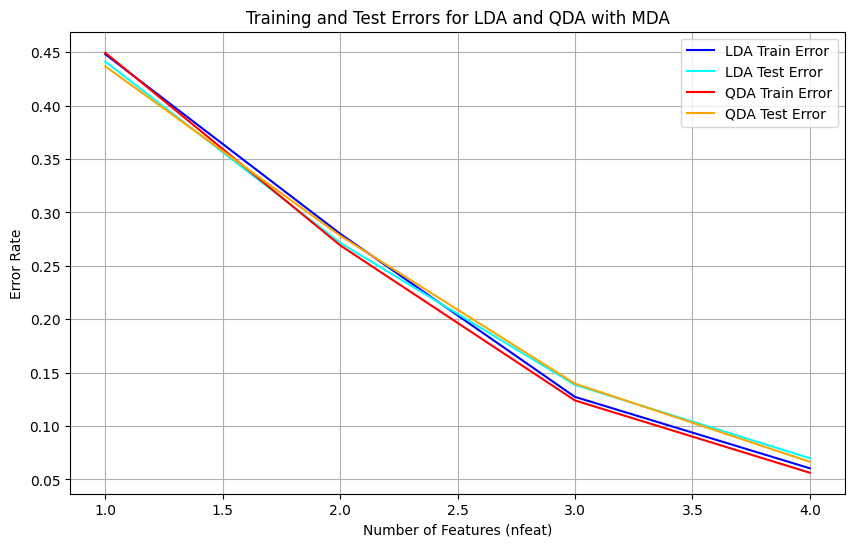

In [ ]:


X = df.iloc[:, :-1].values  #feature
y = df.iloc[:, -1].values   #labels

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lda_train_errors = []
lda_test_errors = []
qda_train_errors = []
qda_test_errors = []

# Maximum number of features that can be selected by MDA is the number of classes minus 1
n_classes = len(np.unique(y_train))
n_features_max = min(X_train.shape[1], n_classes - 1)

for nfeat in range(1, n_features_max + 1):
    #MDA
    mda = LDA(n_components=nfeat)
    X_train_mda = mda.fit_transform(X_train_scaled, y_train)
    X_test_mda = mda.transform(X_test_scaled)

    #LDA
    lda = LDA()
    lda.fit(X_train_mda, y_train)
    y_train_pred_lda = lda.predict(X_train_mda)
    y_test_pred_lda = lda.predict(X_test_mda)

    #train test err LDA
    lda_train_error = 1 - accuracy_score(y_train, y_train_pred_lda)
    lda_test_error = 1 - accuracy_score(y_test, y_test_pred_lda)

    lda_train_errors.append(lda_train_error)
    lda_test_errors.append(lda_test_error)

    #QDA
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_mda, y_train)
    y_train_pred_qda = qda.predict(X_train_mda)
    y_test_pred_qda = qda.predict(X_test_mda)

    #train test err QDA
    qda_train_error = 1 - accuracy_score(y_train, y_train_pred_qda)
    qda_test_error = 1 - accuracy_score(y_test, y_test_pred_qda)

    qda_train_errors.append(qda_train_error)
    qda_test_errors.append(qda_test_error)

# Plot the error curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_max + 1), lda_train_errors, label='LDA Train Error', color='blue')
plt.plot(range(1, n_features_max + 1), lda_test_errors, label='LDA Test Error', color='cyan')
plt.plot(range(1, n_features_max + 1), qda_train_errors, label='QDA Train Error', color='red')
plt.plot(range(1, n_features_max + 1), qda_test_errors, label='QDA Test Error', color='orange')

plt.xlabel('Number of Features (nfeat)')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors for LDA and QDA with MDA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(lda_train_errors[3],
lda_test_errors[3],
qda_train_errors[3],
qda_test_errors[3])


0.0604547975596228 0.06984478935698446 0.05629506378258453 0.0665188470066519
